<a href="https://colab.research.google.com/github/Santt89/Proyecto_turistas_y_dolar/blob/main/Proyecto_turistas_y_d%C3%B3lar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 2**

# **Fundamentos de Ciencia de Datos**

En primer lugar importamos las librerias necesarias para realizar nuestro análisis.

In [232]:
import pandas as pd
import numpy as np
from google.colab.data_table import DataTable
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Cargamos el archivo de Excel `tc_turistas.xlsx`

Para cargarlo le especificamos a la funcion **read_excel** de la libreria Pandas los siguientes argumentos:

*   Nombre del archivo a leer = 'provicias_datos_2022.csv'
*   sheet_name = 'tipos de cambio' : Aqui seleccionamos la hoja de Excel que queremos cargar.

Como son 2 hojas las que queremos cargar, luego hacemos lo mismo pero pondremos sheet_name = 'llegadas de turistas'


In [233]:
df_cambio = pd.read_excel('tc_turistas.xlsx' , sheet_name= 'tipos de cambio')

In [234]:
df_turistas = pd.read_excel('tc_turistas.xlsx' , sheet_name= 'llegadas de turistas')

Analizamos el tipo de datos de ambos DataFrame

In [235]:
df_cambio.dtypes

FECHA            datetime64[ns]
DOLAR Oficial           float64
DOLAR Blue              float64
dtype: object

In [236]:
df_turistas.dtypes

anio          int64
mes          object
date          int64
Bolivia     float64
Brasil      float64
Chile       float64
Paraguay    float64
Uruguay     float64
dtype: object

In [238]:
DataTable(df_cambio)

,FECHA,DOLAR Oficial,DOLAR Blue
0,2017-06-01,16.25,16.30
1,2017-06-02,16.20,16.32
2,2017-06-03,NaN,NaN
3,2017-06-04,NaN,NaN
4,2017-06-05,16.20,16.34
...,...,...,...
999,2020-02-25,NaN,NaN
1000,2020-02-26,63.75,78.70
1001,2020-02-27,63.75,78.50
1002,2020-02-28,64.00,78.50


In [239]:
DataTable(df_turistas)

,anio,mes,date,Bolivia,Brasil,Chile,Paraguay,Uruguay
0,2013,ene,2013-01-01,141417.459190,112996.623524,66007.699999,50277.720853,52456.413939
1,2013,feb,2013-02-01,95204.256341,161366.098439,62013.313451,52666.951095,41377.875955
2,2013,mar,2013-03-01,82862.061107,96727.365114,81096.057038,92714.958474,43728.713276
3,2013,abr,2013-04-01,72009.462620,66978.888460,55096.585327,67716.242304,27458.646062
4,2013,may,2013-05-01,79131.435938,63886.966089,61641.446807,70544.694702,23592.398421
...,...,...,...,...,...,...,...,...
94,2020,nov,2020-11-01,1868.060742,1148.292597,1428.614468,704.834018,594.506976
95,2020,dic,2020-12-01,3475.369209,2825.002741,2039.197452,1181.105147,1262.908653
96,2021,ene,2021-01-01,2103.968847,2280.762734,936.002013,420.318600,3618.940424
97,2021,feb,2021-02-01,874.787203,1419.760103,476.856105,879.535790,1713.991928


Cambiaremos el tipo de dato de la columna `date` de `df_turistas` a `datetime`. Como podemos notar la fecha se encuentra en una serie de numeros enteros, en este caso la fecha se suele respresentar como la cantidad de dias que pasaron desde el año 1900 hasta la fecha deseada.

In [ ]:
df_turistas['date'] = pd.to_datetime(df_turistas['date'], unit='d', origin='1899-12-30')

Ajustamos la frecuencia del DF `tipos de cambio` a mensual. Filtraremos solo las fechas que los dias son 01.

Crearemos un nuevo DF para hacer lo dicho anteriormente.

In [240]:
# Filtrar las fechas que terminen en 01
df_cambio_mensual = df_cambio[df_cambio['FECHA'].dt.day == 1]

In [241]:
DataTable(df_cambio_mensual)

,FECHA,DOLAR Oficial,DOLAR Blue
0,2017-06-01,16.250,16.30
30,2017-07-01,NaN,NaN
61,2017-08-01,17.785,17.47
92,2017-09-01,17.400,18.15
122,2017-10-01,NaN,NaN
153,2017-11-01,17.800,18.03
183,2017-12-01,17.450,18.01
214,2018-01-01,NaN,NaN
245,2018-02-01,19.650,19.93
273,2018-03-01,20.400,20.40


Ahora, analizaremos un poco los DF. Visualizando mediante gráficos y medidas de resumen. Verificaremos la distribución
de las variables, la presencia de valores faltantes o extremos, y las correlaciones entre las variables.



In [242]:
df_cambio_mensual.describe()

,DOLAR Oficial,DOLAR Blue
count,18.000000,18.000000
mean,32.863056,33.299444
std,14.972693,15.488706
min,16.250000,16.300000
25%,18.262500,18.595000
50%,32.300000,32.525000
75%,42.725000,42.725000
max,63.500000,67.500000


Podemos observar que las variables `DOLAR Oficial` y `DOLAR Blue` son muy similares.


Buscamos valores nulos en los dataframes y vemos que no hay ninguno en `df_turistas` y hay 30 en en `df_cambio_mensual`

In [243]:
df_turistas.isna().sum()

anio        0
mes         0
date        0
Bolivia     0
Brasil      0
Chile       0
Paraguay    0
Uruguay     0
dtype: int64

In [244]:
df_cambio_mensual.isna().sum()

FECHA             0
DOLAR Oficial    15
DOLAR Blue       15
dtype: int64

Vemos las medidas de `df_turistas`

In [245]:
df_turistas.describe()

,anio,Bolivia,Brasil,Chile,Paraguay,Uruguay
count,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000
mean,2016.636364,92308.571748,84346.329252,5.776150e+12,60989.584906,32599.175975
std,2.396658,41284.174217,48905.763986,5.747196e+13,29121.830455,19648.454345
min,2013.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2015.000000,83523.572642,60852.972868,5.593270e+04,50328.435487,22727.447551
50%,2017.000000,96403.663942,82062.531176,6.560215e+04,65150.429270,26551.027075
75%,2019.000000,113500.583147,103991.830408,7.832977e+04,75239.448809,44137.255384
max,2021.000000,187955.462617,242582.710997,5.718388e+14,138972.595060,86374.676210


Podemos observar que el valor máximo de la variable `chile` es muy distinto al resto de los valores máximos del resto de las variables. Se podria tratar de un valor atípico. Luego lo visualizaremos mejor con un gráfico.

En cuanto a los valores mínimos, nos parecio raro que todos los paises tengan meses en donde nadie viajó a Argentina, por lo que analizamos y tiene sentido que estos meses coincidan ya que no estaba permitido viajar debido a la pandemia.

In [246]:
df_turistas[df_turistas['anio']==2020]

,anio,mes,date,Bolivia,Brasil,Chile,Paraguay,Uruguay
84,2020,ene,2020-01-01,185654.255495,130090.247211,90585.962868,62637.613230,85464.393671
85,2020,feb,2020-02-01,109344.929596,208970.033847,75102.247031,68968.056898,75996.952208
86,2020,mar,2020-03-01,55108.674536,45965.576012,34566.124872,28008.946794,28685.025186
87,2020,abr,2020-04-01,0.000000,0.000000,0.000000,0.000000,0.000000
88,2020,may,2020-05-01,0.000000,0.000000,0.000000,0.000000,0.000000
89,2020,jun,2020-06-01,0.000000,0.000000,0.000000,0.000000,0.000000
90,2020,jul,2020-07-01,135.747575,86.742388,63.065229,95.666667,137.677630
91,2020,ago,2020-08-01,353.391235,73.511736,874.792960,228.970103,169.311363
92,2020,sep,2020-09-01,359.748067,189.194647,698.715204,261.928420,258.515911
93,2020,oct,2020-10-01,575.000000,295.328770,558.000000,322.000000,462.000000


Comenzaremos graficando las variables del `df_cambio_mensual` en graficos de series de tiempo.

Lo haremos mediante la libreria `matplotlib.pyplot`

Comenzamos con la variable `DOLAR Oficial`

Text(0.5, 1.0, 'Crecimiento del precio del DOLAR Oficial')

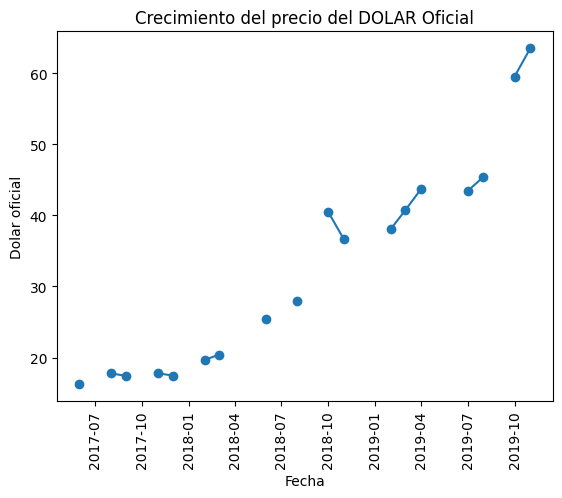

In [247]:
plt.plot(df_cambio_mensual['FECHA'], df_cambio_mensual['DOLAR Oficial'] , '-o')
plt.xlabel('Fecha')
plt.ylabel('Dolar oficial')
plt.xticks(rotation=90)
plt.title('Crecimiento del precio del DOLAR Oficial')

Facilmente podemos notar que hay gran numero de valores faltantes, pero podemos observar una tendencia entre las lineas, nos podemos imaginar una curva que sube con el paso del tiempo.

Ahora graficaremos `DOLAR Blue`

Text(0.5, 1.0, 'Crecimiento del precio del DOLAR Blue')

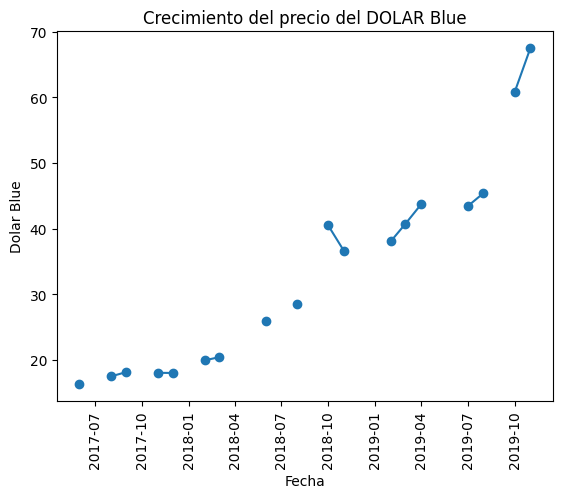

In [248]:
plt.plot(df_cambio_mensual['FECHA'], df_cambio_mensual['DOLAR Blue'] ,   '-o')
plt.xlabel('Fecha')
plt.ylabel('Dolar Blue')
plt.xticks(rotation=90)
plt.title('Crecimiento del precio del DOLAR Blue')

Lo mismo para esta variable, facilmente podemos notar que hay gran numero de valores faltantes, pero podemos observar una tendencia entre las lineas, nos podemos imaginar una curva que sube con el paso del tiempo.

Ahora graficaremos las dos en simultaneo.

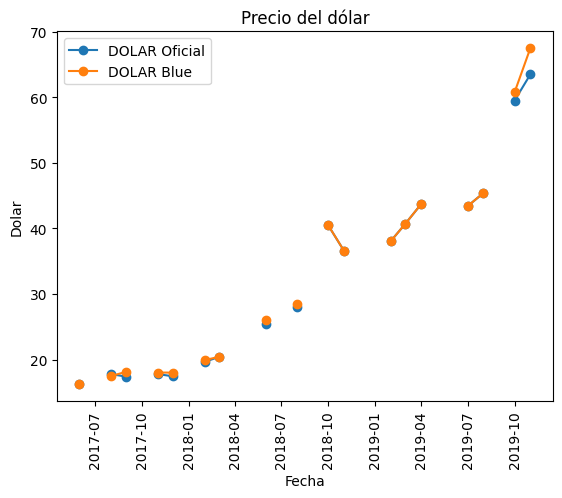

In [249]:
plt.plot(df_cambio_mensual['FECHA'], df_cambio_mensual['DOLAR Oficial'] ,  '-o', label = 'DOLAR Oficial')
plt.plot(df_cambio_mensual['FECHA'], df_cambio_mensual['DOLAR Blue'] , '-o', label = 'DOLAR Blue')
plt.xlabel('Fecha')
plt.ylabel('Dolar')
plt.xticks(rotation=90)
plt.title('Precio del dólar')
plt.legend()

Comparando las variables, podemos visualizar que el comportamiento es muy similar pero el `DOLAR Blue` casi siempre está por encima del `DOLAR Oficial`.

Ahora graficaremos las variables del `df_turistas`

Lo haremos mediante la libreria `matplotlib.pyplot`

En primer lugar, comenzaremos graficando la variable `Chile` ya que como dijimos anteriormente, es muy probable que la misma tenga un valor atípico.

La graficaremos mediante un `boxplot`.

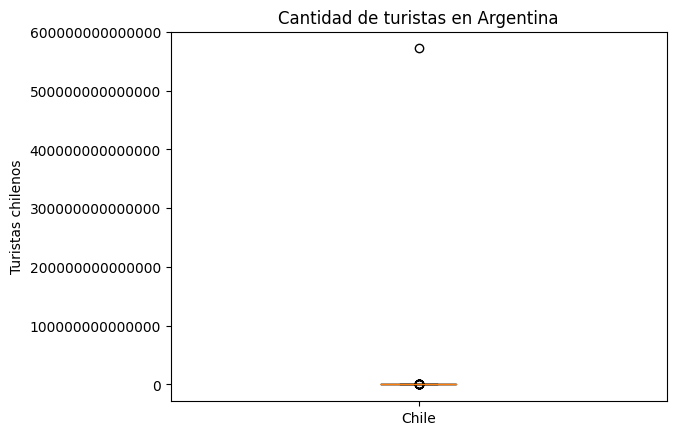

In [250]:
plt.boxplot(df_turistas['Chile'])
plt.xticks([1], ['Chile'])
plt.ylabel('Turistas chilenos')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Cantidad de turistas en Argentina')

plt.show()

Claramente podemos notar que hay un valor atípico y erroneo en el máximo.
Consideramos que es erroneo porque es muchisima la diferencia con los otros valores y no tiene sentido.

Lo que haremos a continuación será eliminar el valor atípico de `chile` , y lo reemplazaremos por un valor nulo. Hacemos esto, para luego poder hacer una interpolación lineal.

Como sabemos que el valor atípico es el máximo, lo guardamos en una variable

In [251]:
atipico = df_turistas['Chile'].max()

Reemplazamos el valor atipico por el valor nulo

In [252]:
df_turistas['Chile'] = df_turistas['Chile'].replace(atipico, np.nan)

Realizamos una interpolación lineal para rellenar el campo vacio

In [253]:
df_turistas['Chile'] = df_turistas['Chile'].interpolate()

Visualizamos nuevamente la variable `chile` pero ya con el valor erroneo corregido.

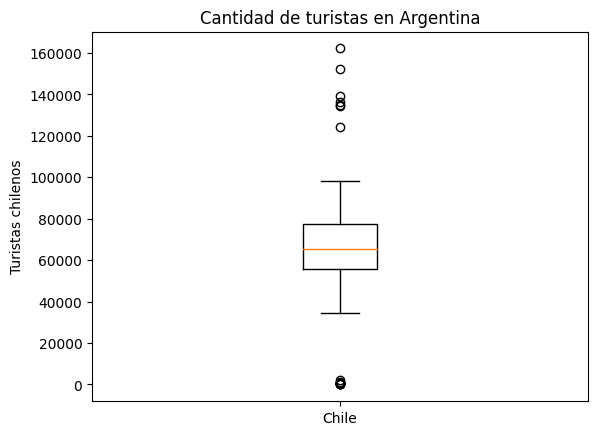

In [254]:
plt.boxplot(df_turistas['Chile'])
plt.xticks([1], ['Chile'])
plt.ylabel('Turistas chilenos')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Cantidad de turistas en Argentina')

plt.show()

Observaremos el número de turistas cada mes durante el transcurso de años desde 2013 a 2021.



Text(0.5, 1.0, 'Turistas chilenos')

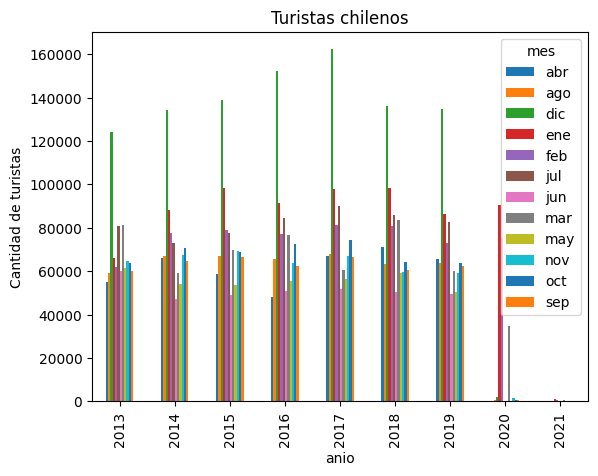

In [255]:
df_turistas.groupby(['anio','mes'])['Chile'].mean().unstack().plot(kind = 'bar')
plt.ylabel('Cantidad de turistas')
plt.title('Turistas chilenos')

Podemos ver claramente que la mayoria de los turistas eligen venir los meses de verano, mas que nada en Diciembre. Tambien hay que destacar una gran proporción que elige Julio para visitar Argentina.

Text(0.5, 1.0, 'Turistas brasileros')

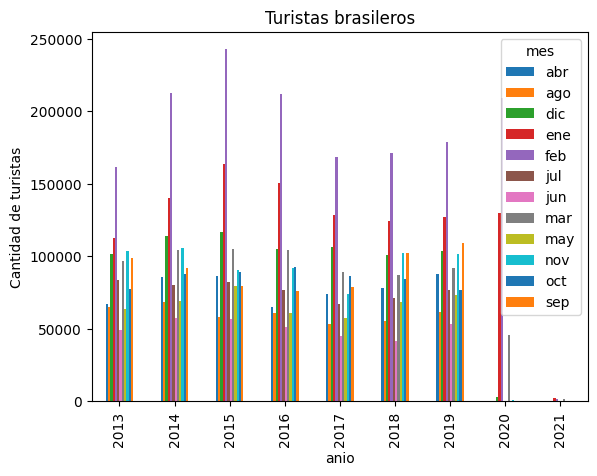

In [256]:
df_turistas.groupby(['anio','mes'])['Brasil'].mean().unstack().plot(kind = 'bar')
plt.ylabel('Cantidad de turistas')
plt.title('Turistas brasileros')

Vemos que tambien suelen venir mas turistas en verano, pero esta vez es Febrero el mes mas elegido por brasileros.

Text(0.5, 1.0, 'Turistas uruguayos')

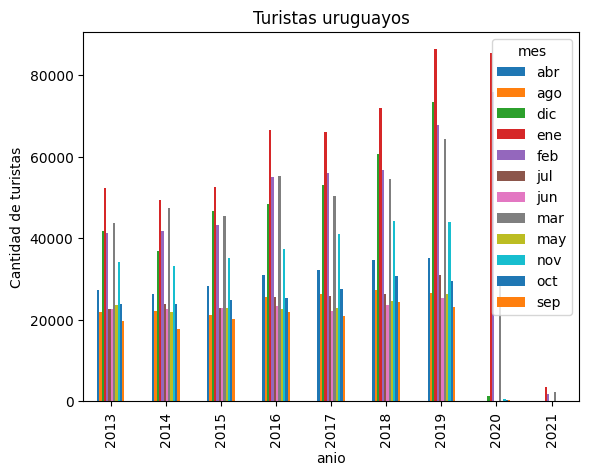

In [257]:
df_turistas.groupby(['anio','mes'])['Uruguay'].mean().unstack().plot(kind = 'bar')
plt.ylabel('Cantidad de turistas')
plt.title('Turistas uruguayos')

Como antes, los meses mas elegidos son los correspondientes al verano.

Text(0.5, 1.0, 'Turistas paraguayos')

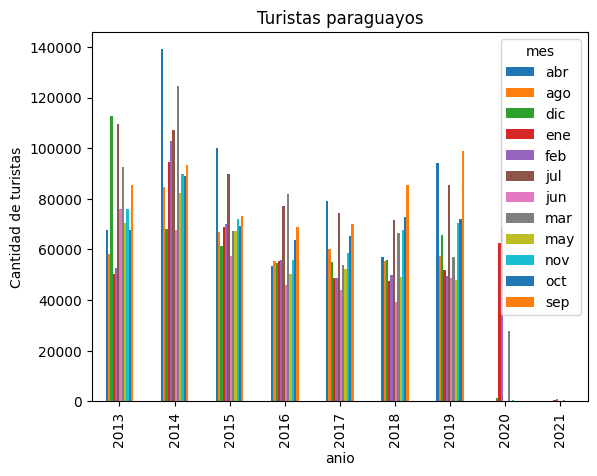

In [258]:
df_turistas.groupby(['anio','mes'])['Paraguay'].mean().unstack().plot(kind = 'bar')
plt.ylabel('Cantidad de turistas')
plt.title('Turistas paraguayos')

Con respecto a los turistas paraguayos, es muy variado el numero de turistas por mes en los distintos años, igualmente se puede destacar Abril como uno de los meses mas elegidos.

Text(0.5, 1.0, 'Turistas bolivianos')

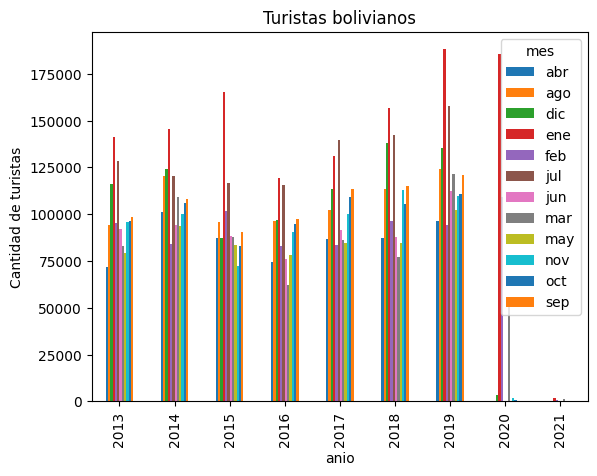

In [259]:
df_turistas.groupby(['anio','mes'])['Bolivia'].mean().unstack().plot(kind = 'bar')
plt.ylabel('Cantidad de turistas')
plt.title('Turistas bolivianos')

Vemos que los turistas bolivianos suelen venir en mayor numero, los meses de Diciembre, Enero y Julio

Por ultimo, comparemos las variables en un mismo gráfico de series de tiempo.

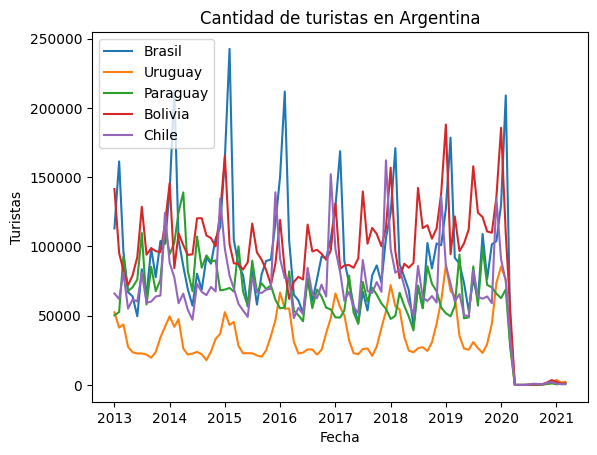

In [260]:
plt.plot(df_turistas['date'], df_turistas['Brasil'], label = 'Brasil')
plt.plot(df_turistas['date'], df_turistas['Uruguay'], label = 'Uruguay')
plt.plot(df_turistas['date'], df_turistas['Paraguay'], label = 'Paraguay')
plt.plot(df_turistas['date'], df_turistas['Bolivia'], label = 'Bolivia')
plt.plot(df_turistas['date'], df_turistas['Chile'], label = 'Chile')
plt.xlabel('Fecha')
plt.ylabel('Turistas')
plt.title('Cantidad de turistas en Argentina')
plt.legend()

Este gráfico es muy interesante, ya que podemos notar como se ha ido modificando la cantidad de turistas que han venido de los paises vecinos a lo largo de los años. Podemos observar que antes del 2018 Brasil es el que mas predominaba, luego comenzó a estar mas igualado con Bolivia. Por otro lado Uruguay es del pais que menos turistas han venido aunque se puede notar un aumento con el transcurso de los años.

**Ahora analizaremos la relación que hay entre las variables**

Comenzamos con `df_cambio_mensual`

Hacemos la matriz de covarianza

In [261]:
df_cambio_mensual.cov()

<ipython-input-261-de7a3797793b>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cambio_mensual.cov()


,DOLAR Oficial,DOLAR Blue
DOLAR Oficial,224.181539,231.575887
DOLAR Blue,231.575887,239.900017


Hacemos la matriz de correlación

In [262]:
cambio_corr = df_cambio_mensual.corr()

<ipython-input-262-0bb6c2938b02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cambio_corr = df_cambio_mensual.corr()


In [263]:
cambio_corr

,DOLAR Oficial,DOLAR Blue
DOLAR Oficial,1.000000,0.998569
DOLAR Blue,0.998569,1.000000


Anteriormente ya lo habiamos notado, pero ahora lo confirmamos. Las variables `DOLAR Oficial` y `DOLAR Blue` actuan muy similarmente. Hay una fuerte y clara relación entre ellas.

<Axes: >

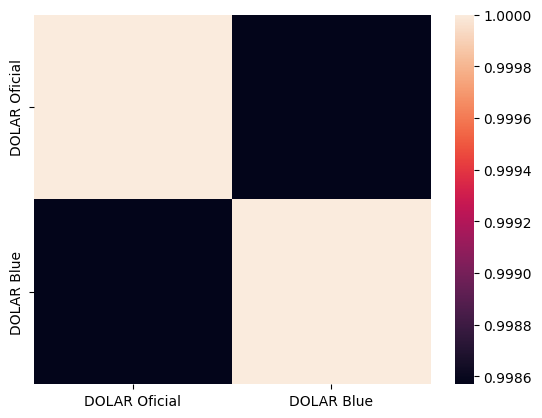

In [264]:
sns.heatmap(cambio_corr, annot=False)

Ahora las analizaremos en un gráfico.

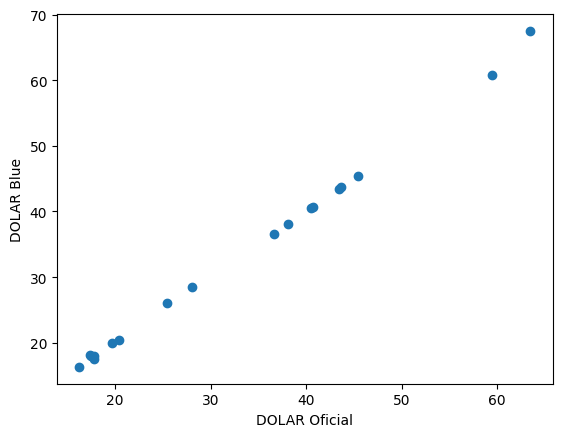

In [265]:
plt.scatter( df_cambio_mensual['DOLAR Oficial'],df_cambio_mensual['DOLAR Blue'])

plt.xlabel('DOLAR Oficial')
plt.ylabel('DOLAR Blue')

plt.show()

Podemos notar que hay una clara relación lineal positiva entre ambas variables.

Ahora analizaremos `df_turistas`

Hacemos la matriz de covarianza.

In [266]:
df_turistas.cov()

<ipython-input-266-8d1ee9a578b7>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_turistas.cov()


,anio,Bolivia,Brasil,Chile,Paraguay,Uruguay
anio,5.743970,-3.487913e+04,-4.117156e+04,-3.145933e+04,-4.636660e+04,-4.976407e+03
Bolivia,-34879.127775,1.704383e+09,1.235645e+09,1.025055e+09,8.181508e+08,5.578551e+08
Brasil,-41171.555422,1.235645e+09,2.391774e+09,1.038427e+09,7.468862e+08,7.501659e+08
Chile,-31459.327450,1.025055e+09,1.038427e+09,1.064250e+09,5.566488e+08,4.576140e+08
Paraguay,-46366.604664,8.181508e+08,7.468862e+08,5.566488e+08,8.480810e+08,2.054733e+08
Uruguay,-4976.407270,5.578551e+08,7.501659e+08,4.576140e+08,2.054733e+08,3.860618e+08


Observando la matriz podemos notar algunas relaciones lineales entre las variables

Por ejemplo, podemos notar hay una relación fuerte y positiva entre las variables `Brasil` y `Uruguay`

Ahora, haremos la matriz de correlación

In [267]:
turistas_corr = df_turistas.corr()

<ipython-input-267-c8c6c401b559>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  turistas_corr = df_turistas.corr()


In [268]:
turistas_corr

,anio,Bolivia,Brasil,Chile,Paraguay,Uruguay
anio,1.000000,-0.352514,-0.351262,-0.402366,-0.664325,-0.105677
Bolivia,-0.352514,1.000000,0.611998,0.761100,0.680505,0.687716
Brasil,-0.351262,0.611998,1.000000,0.650870,0.524416,0.780673
Chile,-0.402366,0.761100,0.650870,1.000000,0.585923,0.713919
Paraguay,-0.664325,0.680505,0.524416,0.585923,1.000000,0.359094
Uruguay,-0.105677,0.687716,0.780673,0.713919,0.359094,1.000000


Observando la matriz podemos notar mas detalladamente algunas relaciones.

Volviendo al ejemplo mencionado anteriormente, podemos notar que el valor que hay entre las variables `Brasil` y `Uruguay` es bastante cercano a 1 por lo que hay una clara relación positiva.


Graficamos la matriz de correlación para podes visualizar mejor las relaciones.

Utilizamos la libreria `seaborn`

<Axes: >

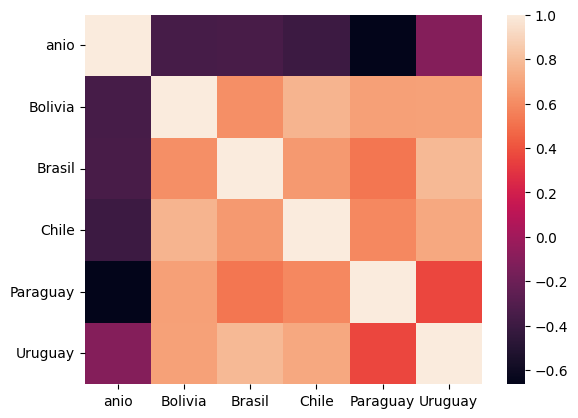

In [269]:
sns.heatmap(turistas_corr, annot=False)

Podemos notar que hay muchas relaciones interesantes. Son muy similares las relaciones que hay entre las variables.

Ahora vamos a encargarnos de solucionar el problema de los datos faltantes y atípicos. (El dato erroneo de la variable `chile` del `df_turistas` ya lo arreglamos anteriormente)

Como observamos anteriormente en el `df_cambio_mensual` hay muchos valores faltantes.

Lo que haremos a continuación, será utilizar la función `interpolate()` de `pandas` para relizar una interpolación lineal para completar los valores faltantes.

In [270]:
df_cambio_mensual['DOLAR Oficial'] = df_cambio_mensual['DOLAR Oficial'].interpolate()

<ipython-input-270-fe72c9be53a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cambio_mensual['DOLAR Oficial'] = df_cambio_mensual['DOLAR Oficial'].interpolate()


In [271]:
df_cambio_mensual['DOLAR Blue'] = df_cambio_mensual['DOLAR Blue'].interpolate()

<ipython-input-271-fe0ef80c6318>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cambio_mensual['DOLAR Blue'] = df_cambio_mensual['DOLAR Blue'].interpolate()


Veremos a continuación, el gráfico visto anteriormente, pero ahora con todos los valores.

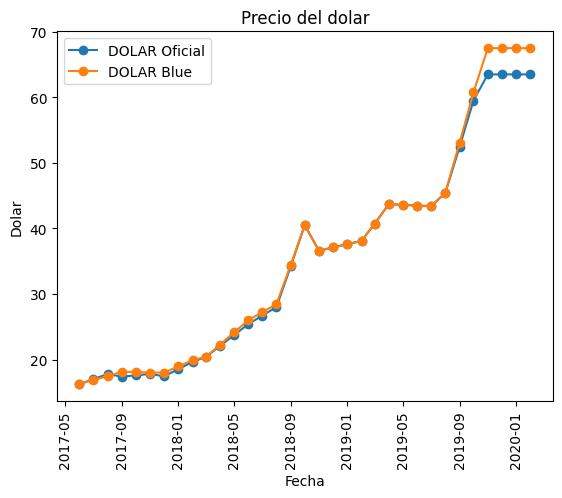

In [272]:
plt.plot(df_cambio_mensual['FECHA'], df_cambio_mensual['DOLAR Oficial'] ,  '-o', label = 'DOLAR Oficial')
plt.plot(df_cambio_mensual['FECHA'], df_cambio_mensual['DOLAR Blue'] , '-o', label = 'DOLAR Blue')
plt.xlabel('Fecha')
plt.ylabel('Dolar')
plt.xticks(rotation=90)
plt.title('Precio del dolar')
plt.legend()

Una vez terminado el curado de datos, lo que haremos será utlizar la función `merge` de `pandas` entre las tablas para poder ver la relación que hay entre las variables de las mismas.

Como en ambos DF tenemos una columna con fechas, lo que haremos será combinar las tablas a través de esta columna. Cambiaremos el nombre de la columna `FECHA` de `df_cambio_mensual` para que coincida con la columna `date` de `df_turistas`


In [273]:
df_cambio_mensual_date = df_cambio_mensual.rename(columns={'FECHA': 'date'})

In [274]:
df_turistas.head()

,anio,mes,date,Bolivia,Brasil,Chile,Paraguay,Uruguay
0,2013,ene,2013-01-01,141417.459190,112996.623524,66007.699999,50277.720853,52456.413939
1,2013,feb,2013-02-01,95204.256341,161366.098439,62013.313451,52666.951095,41377.875955
2,2013,mar,2013-03-01,82862.061107,96727.365114,81096.057038,92714.958474,43728.713276
3,2013,abr,2013-04-01,72009.462620,66978.888460,55096.585327,67716.242304,27458.646062
4,2013,may,2013-05-01,79131.435938,63886.966089,61641.446807,70544.694702,23592.398421


In [275]:
df_combinado = pd.merge(df_turistas, df_cambio_mensual_date, on='date', how='inner')

In [276]:
DataTable(df_combinado)

,anio,mes,date,Bolivia,Brasil,Chile,Paraguay,Uruguay,DOLAR Oficial,DOLAR Blue
0,2017,jun,2017-06-01,91354.049617,44950.100203,51901.535013,44105.843642,22149.611737,16.250000,16.300000
1,2017,jul,2017-07-01,139655.189842,67292.051624,90150.720265,74440.319318,25872.622074,17.017500,16.885000
2,2017,ago,2017-08-01,101980.117658,53708.231318,67773.202977,60127.471542,26348.432276,17.785000,17.470000
3,2017,sep,2017-09-01,113370.201534,79188.743234,66416.897176,70244.989691,20974.981872,17.400000,18.150000
4,2017,oct,2017-10-01,108988.942830,86278.997538,74250.658926,65150.429270,27705.555223,17.600000,18.090000
5,2017,nov,2017-11-01,100106.968676,73925.388602,67212.365450,58810.248431,41117.004781,17.800000,18.030000
6,2017,dic,2017-12-01,113630.964759,106258.506712,162180.202597,54931.646242,53165.089707,17.450000,18.010000
7,2018,ene,2018-01-01,156813.486315,124143.934448,98232.317616,47638.531231,72066.767073,18.550000,18.970000
8,2018,feb,2018-02-01,96556.651679,170947.010047,80980.759478,49857.493343,56729.301218,19.650000,19.930000
9,2018,mar,2018-03-01,77099.680077,87156.198233,83496.145311,66549.176839,54561.042183,20.400000,20.400000


Como podemos observar, las variables `DOLAR Oficial` y `DOLAR Blue` tienen unidades muy distintas a comparación de los paises. Para poder comparar estas variables, lo que necesitamos hacer es una normalización. Al hacer la misma llevaremos los valores de las variables al rango [0,1] y asi poder trabajar con ellas.

Lo que haremos a continuación será normalizar las variables para que las podamos comparar. Utilizaremos la libreria `klearn.preprocessing`.

In [277]:
# Crea una instancia del objeto MinMaxScaler
scaler = MinMaxScaler()

df_combinado[['Bolivia', 'Brasil' , 'Chile' , 'Paraguay', 'Uruguay' ,  'DOLAR Oficial' , 'DOLAR Blue']] = scaler.fit_transform(df_combinado[['Bolivia', 'Brasil' , 'Chile' , 'Paraguay', 'Uruguay' ,  'DOLAR Oficial' , 'DOLAR Blue']])


In [278]:
DataTable(df_combinado)

,anio,mes,date,Bolivia,Brasil,Chile,Paraguay,Uruguay,DOLAR Oficial,DOLAR Blue
0,2017,jun,2017-06-01,0.128585,0.018016,0.022967,0.079172,0.017961,0.000000,0.000000
1,2017,jul,2017-07-01,0.564296,0.151777,0.361842,0.588811,0.074888,0.016243,0.011426
2,2017,ago,2017-08-01,0.224440,0.070451,0.163584,0.348346,0.082163,0.032487,0.022852
3,2017,sep,2017-09-01,0.327187,0.223002,0.151568,0.518327,0.000000,0.024339,0.036133
4,2017,oct,2017-10-01,0.287664,0.265451,0.220973,0.432735,0.102914,0.028571,0.034961
5,2017,nov,2017-11-01,0.207543,0.191491,0.158616,0.326216,0.307983,0.032804,0.033789
6,2017,dic,2017-12-01,0.329539,0.385068,1.000000,0.261053,0.492206,0.025397,0.033398
7,2018,ene,2018-01-01,0.719077,0.492148,0.433442,0.138524,0.781224,0.048677,0.052148
8,2018,feb,2018-02-01,0.175516,0.772357,0.280599,0.175804,0.546705,0.071958,0.070898
9,2018,mar,2018-03-01,0.000000,0.270703,0.302885,0.456235,0.513551,0.087831,0.080078


A continuación, analizaremos una pregunta que es muy interesante, y sobre todo en un país como el nuestro que el dólar aumenta constantemente...

**¿Como afecta el precio del dólar a la llegada de turistas?**

Analizaremos esta pregunta con respecto a la variable `DOLAR Oficial`

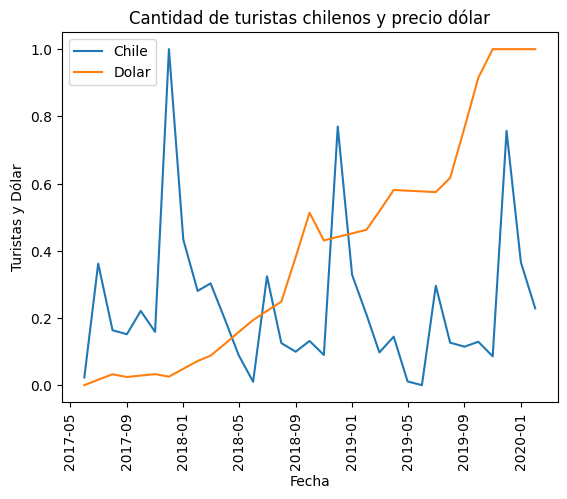

In [279]:
plt.plot(df_combinado['date'], df_combinado['Chile'], label = 'Chile')
plt.plot(df_combinado['date'], df_combinado['DOLAR Oficial'], label = 'Dolar')
plt.xlabel('Fecha')
plt.ylabel('Turistas y Dólar')
plt.xticks(rotation=90)
plt.title('Cantidad de turistas chilenos y precio dólar')
plt.legend()

Podemos notar que el pico maximo de turismo chileno fue a principios del 2018, luego el dolar comenzo a subir de precio y el turismo bajó y sus futuros picos no superaron al máximo.

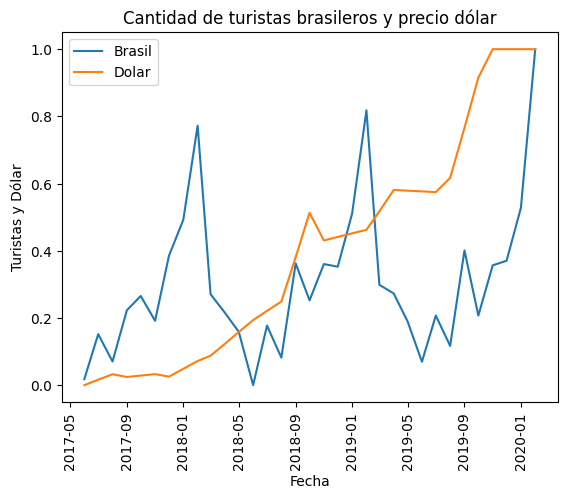

In [280]:
plt.plot(df_combinado['date'], df_combinado['Brasil'], label = 'Brasil')
plt.plot(df_combinado['date'], df_combinado['DOLAR Oficial'], label = 'Dolar')
plt.xlabel('Fecha')
plt.ylabel('Turistas y Dólar')
plt.xticks(rotation=90)
plt.title('Cantidad de turistas brasileros y precio dólar')
plt.legend()

Podemos notar que la cantidad de turismo brasilero aumenta a medida que el dólar amuenta. Si bien tiene valores minimos, los valores maximos crecen a medida que el dólar crece.

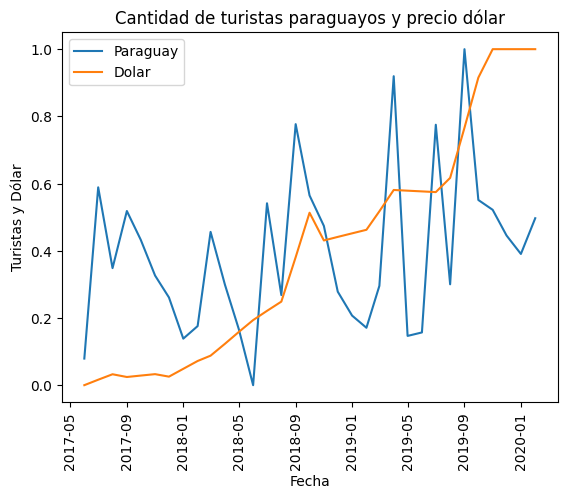

In [281]:
plt.plot(df_combinado['date'], df_combinado['Paraguay'], label = 'Paraguay')
plt.plot(df_combinado['date'], df_combinado['DOLAR Oficial'], label = 'Dolar')
plt.xlabel('Fecha')
plt.ylabel('Turistas y Dólar')
plt.xticks(rotation=90)
plt.title('Cantidad de turistas paraguayos y precio dólar')
plt.legend()

Como en el caso anterior, podemos notar que el turismo paraguayo crece a medida que el dólar aumenta.

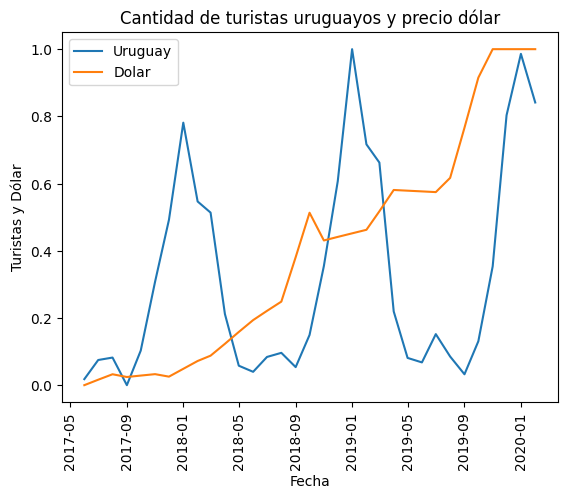

In [282]:
plt.plot(df_combinado['date'], df_combinado['Uruguay'], label = 'Uruguay')
plt.plot(df_combinado['date'], df_combinado['DOLAR Oficial'], label = 'Dolar')
plt.xlabel('Fecha')
plt.ylabel('Turistas y Dólar')
plt.xticks(rotation=90)
plt.title('Cantidad de turistas uruguayos y precio dólar')
plt.legend()

Similar al caso anterior, los picos maximos son cada vez mayores a medida que aumenta el dólar.

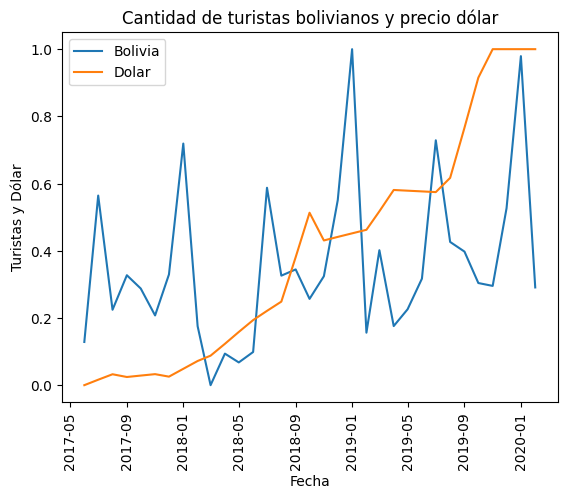

In [283]:
plt.plot(df_combinado['date'], df_combinado['Bolivia'], label = 'Bolivia')
plt.plot(df_combinado['date'], df_combinado['DOLAR Oficial'], label = 'Dolar')
plt.xlabel('Fecha')
plt.ylabel('Turistas y Dólar')
plt.xticks(rotation=90)
plt.title('Cantidad de turistas bolivianos y precio dólar')
plt.legend()

Como en los ejemplos anteriores, a medida que el dolar aumenta, los picos maximos aumetan.

# **Conclusión:**

Nuestra conclusión acerca de la pregunta:

**¿Como afecta el precio del dólar a la llegada de turistas?**

En la mayoria de los casos, se puede notar una cierta relación entre la cantidad de turistas y el precio del dólar. Si bien es cierto que Argentina de por si es un país con muchos turistas, el aumento del dólar genera que Argentina sea una opción mas que factible para turismo. Esto se debe a que cuando el dólar aumenta en relación a la moneda local, a los turistas les resulta mas económico venir a nuestro país. Sus monedas se vuelven mas fuertes en comparación a la nuestra y esto hace que les salga mas rentable venir a Argentina ya que pagarán mas barato la estadia, la comida , la ropa , etc.

Código en donde convertimos los DF en formato parquet.

In [284]:
#df_cambio_mensual.to_parquet('df_cambio_mensual_parquet')

In [285]:
#df_turistas.to_parquet('df_turistas_parquet')